# Survival Predication - Binary Classification using Different ML techniques
<p align="right">Prabhat Turlapati</p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-packages-required" data-toc-modified-id="Import-the-packages-required-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import the packages required</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Data-Cleaning,-Massaging-and-Engineering" data-toc-modified-id="Data-Cleaning,-Massaging-and-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning, Massaging and Engineering</a></span></li><li><span><a href="#Building-the-Model-and-Testing-the-Accuracy" data-toc-modified-id="Building-the-Model-and-Testing-the-Accuracy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building the Model and Testing the Accuracy</a></span></li></ul></div>

## Import the packages required

In [46]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

# Use Keras simple neural network for prediction
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
np.random.seed(7)


## Load the Data

In [47]:
train_raw = pd.read_csv("train.csv")
test_raw = pd.read_csv("test.csv")

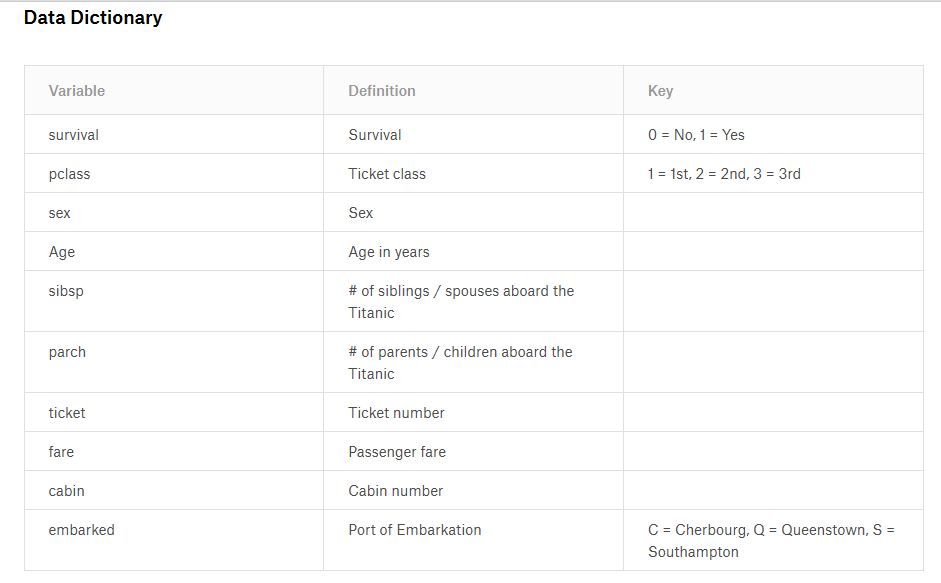

In [48]:
from IPython.display import Image
Image("picture.png")

## Data Cleaning, Massaging and Engineering

In [49]:
# remove un-necessary columns ticket,fare,cabin number,

columns =['PassengerId','Ticket','Fare','Cabin','Name','Embarked']
# train.info()
train = train_raw.drop(columns=columns)
test = test_raw.drop(columns=columns)


In [50]:
train.head()
train = pd.get_dummies(data = train, columns=['Sex'])
# train = pd.get_dummies(data = train, columns=['Embarked'])
train = pd.get_dummies(data = train, columns=['Pclass'])

train.drop(columns=['Sex_female'],inplace=True)

test = pd.get_dummies(data = test, columns=['Sex'])
# test = pd.get_dummies(data = test, columns=['Embarked'])
test = pd.get_dummies(data = test, columns=['Pclass'])

test.drop(columns=['Sex_female'],inplace=True)

In [51]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Sex_male    891 non-null uint8
Pclass_1    891 non-null uint8
Pclass_2    891 non-null uint8
Pclass_3    891 non-null uint8
dtypes: float64(1), int64(3), uint8(4)
memory usage: 31.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Sex_male    418 non-null uint8
Pclass_1    418 non-null uint8
Pclass_2    418 non-null uint8
Pclass_3    418 non-null uint8
dtypes: float64(1), int64(2), uint8(4)
memory usage: 11.5 KB
None


In [52]:
print(train.loc[np.isnan(train['Age'])].head(5))

    Survived  Age  SibSp  Parch  Sex_male  Pclass_1  Pclass_2  Pclass_3
5          0  NaN      0      0         1         0         0         1
17         1  NaN      0      0         1         0         1         0
19         1  NaN      0      0         0         0         0         1
26         0  NaN      0      0         1         0         0         1
28         1  NaN      0      0         0         0         0         1


In [53]:
# Imputing with mean for age
train.Age = train.Age.fillna(value=train.Age.mean())
test.Age = test.Age.fillna(value=test.Age.mean())


In [54]:
print(train.head())
print(test.head())

   Survived   Age  SibSp  Parch  Sex_male  Pclass_1  Pclass_2  Pclass_3
0         0  22.0      1      0         1         0         0         1
1         1  38.0      1      0         0         1         0         0
2         1  26.0      0      0         0         0         0         1
3         1  35.0      1      0         0         1         0         0
4         0  35.0      0      0         1         0         0         1
    Age  SibSp  Parch  Sex_male  Pclass_1  Pclass_2  Pclass_3
0  34.5      0      0         1         0         0         1
1  47.0      1      0         0         0         0         1
2  62.0      0      0         1         0         1         0
3  27.0      0      0         1         0         0         1
4  22.0      1      1         0         0         0         1


In [55]:
y_train = train.Survived
X_train = train.drop(columns=['Survived'])

X_test = test
y_test_raw = pd.read_csv("gender_submission.csv")
y_test = y_test_raw.drop(columns='PassengerId')

## Building the Model and Testing the Accuracy

In [56]:
# Use KNN 
knn_clf = KNeighborsClassifier()
gsv_knn = GridSearchCV(knn_clf,{'n_neighbors':[1,3,5]},cv=3,n_jobs=-1)
gsv_knn.fit(X_train,y_train)
y_pred_knn = gsv_knn.predict(X_test)
acc_knn = accuracy_score(y_pred_knn,y_test)
print("knn acc: ",acc_knn)

# Use DT
dt_clf = DecisionTreeClassifier()
gsv_dt = GridSearchCV(estimator=dt_clf,cv=3,n_jobs=-1,param_grid={'max_depth':[10,100,200,250,500,1000]})
gsv_dt.fit(X_train,y_train)
y_pred_dt = gsv_dt.predict(X_test)
acc_dt = accuracy_score(y_pred_dt,y_test)
print("dt acc: ",acc_dt)

# Use RF DT
rf_clf = RandomForestClassifier()
gsv_rf = GridSearchCV(estimator=rf_clf,cv=3,n_jobs=-1,param_grid={'n_estimators':[10,50,100,1000,10000]})
gsv_rf.fit(X_train,y_train)
y_pred_rf = gsv_rf.predict(X_test)
acc_rf = accuracy_score(y_pred_rf,y_test)
print("rf acc: ",acc_rf)




knn acc:  0.7488038277511961
dt acc:  0.7990430622009569
rf acc:  0.777511961722488


In [57]:
# Use SVC
svc_clf = SVC(kernel='linear')
gsv_svc = GridSearchCV(estimator=svc_clf,cv=3,n_jobs=-1,param_grid={'C':np.logspace(-4,0,1, 2, 3)})
gsv_svc.fit(X_train,y_train)
y_pred_svc = gsv_svc.predict(X_test)
acc_svc = accuracy_score(y_pred_svc,y_test)
print("svc acc: ",acc_svc)


svc acc:  0.9976076555023924


In [58]:
# Use Extremely Randomized forest Classifier
etc_clf = ExtraTreesClassifier(criterion='gini')
gsv_etc = GridSearchCV(estimator=etc_clf,cv=3,n_jobs=-1,param_grid={'n_estimators':[10,50,100,1000,10000]})
gsv_etc.fit(X_train,y_train)
y_pred_etc = gsv_etc.predict(X_test)
acc_etc = accuracy_score(y_pred_etc,y_test)
print("etc acc: ",acc_etc)


etc acc:  0.7607655502392344


In [59]:

model = Sequential()
model.add(Dense(12, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
model.fit(X_train, y_train, nb_epoch=300, batch_size=30)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/300
891/891 [==============================] - 0s 368us/step - loss: 1.7415 - acc: 0.6162
Epoch 2/300
891/891 [==============================] - 0s 35us/step - loss: 0.9975 - acc: 0.6173
Epoch 3/300
891/891 [==============================] - 0s 35us/step - loss: 0.7588 - acc: 0.6229
Epoch 4/300
891/891 [==============================] - 0s 35us/step - loss: 0.6652 - acc: 0.6319
Epoch 5/300
891/891 [==============================] - 0s 35us/step - loss: 0.6407 - acc: 0.6364
Epoch 6/300
891/891 [==============================] - 0s 35us/step - loss: 0.6288 - acc: 0.6397
Epoch 7/300
891/891 [==============================] - 0s 35us/step - loss: 0.6189 - acc: 0.6453
Epoch 8/300
891/891 [==============================] - 0s 35us/step - loss: 0.6096 - acc: 0.6611
Epoch 9/300
891/891 [==============================] - 0s 35us/step - loss: 0.5990 - acc: 0.6835
Epoch 10/300
891/891 [==============================] - 0s 35us/step - loss: 0.5899 - acc: 0.7026
Epoch 11/300
891/891 [======

891/891 [==============================] - 0s 35us/step - loss: 0.4519 - acc: 0.8215
Epoch 85/300
891/891 [==============================] - 0s 35us/step - loss: 0.4545 - acc: 0.8193
Epoch 86/300
891/891 [==============================] - 0s 18us/step - loss: 0.4536 - acc: 0.8193
Epoch 87/300
891/891 [==============================] - 0s 35us/step - loss: 0.4521 - acc: 0.8193
Epoch 88/300
891/891 [==============================] - 0s 35us/step - loss: 0.4517 - acc: 0.8204
Epoch 89/300
891/891 [==============================] - 0s 35us/step - loss: 0.4477 - acc: 0.8193
Epoch 90/300
891/891 [==============================] - 0s 35us/step - loss: 0.4520 - acc: 0.8193
Epoch 91/300
891/891 [==============================] - 0s 35us/step - loss: 0.4483 - acc: 0.8193
Epoch 92/300
891/891 [==============================] - 0s 35us/step - loss: 0.4484 - acc: 0.8182
Epoch 93/300
891/891 [==============================] - 0s 35us/step - loss: 0.4502 - acc: 0.8227
Epoch 94/300
891/891 [===========

891/891 [==============================] - 0s 35us/step - loss: 0.4261 - acc: 0.8249
Epoch 168/300
891/891 [==============================] - 0s 35us/step - loss: 0.4267 - acc: 0.8238
Epoch 169/300
891/891 [==============================] - 0s 35us/step - loss: 0.4264 - acc: 0.8227
Epoch 170/300
891/891 [==============================] - 0s 35us/step - loss: 0.4278 - acc: 0.8238
Epoch 171/300
891/891 [==============================] - 0s 35us/step - loss: 0.4260 - acc: 0.8238
Epoch 172/300
891/891 [==============================] - 0s 35us/step - loss: 0.4273 - acc: 0.8238
Epoch 173/300
891/891 [==============================] - 0s 35us/step - loss: 0.4257 - acc: 0.8249
Epoch 174/300
891/891 [==============================] - 0s 18us/step - loss: 0.4240 - acc: 0.8238
Epoch 175/300
891/891 [==============================] - 0s 35us/step - loss: 0.4247 - acc: 0.8283
Epoch 176/300
891/891 [==============================] - 0s 35us/step - loss: 0.4245 - acc: 0.8272
Epoch 177/300
891/891 [=

891/891 [==============================] - 0s 35us/step - loss: 0.4199 - acc: 0.8283
Epoch 250/300
891/891 [==============================] - 0s 35us/step - loss: 0.4190 - acc: 0.8272
Epoch 251/300
891/891 [==============================] - 0s 35us/step - loss: 0.4177 - acc: 0.8283
Epoch 252/300
891/891 [==============================] - 0s 18us/step - loss: 0.4213 - acc: 0.8339
Epoch 253/300
891/891 [==============================] - 0s 18us/step - loss: 0.4220 - acc: 0.8294
Epoch 254/300
891/891 [==============================] - 0s 35us/step - loss: 0.4182 - acc: 0.8305
Epoch 255/300
891/891 [==============================] - 0s 35us/step - loss: 0.4150 - acc: 0.8294
Epoch 256/300
891/891 [==============================] - 0s 35us/step - loss: 0.4167 - acc: 0.8260
Epoch 257/300
891/891 [==============================] - 0s 35us/step - loss: 0.4161 - acc: 0.8283
Epoch 258/300
891/891 [==============================] - 0s 35us/step - loss: 0.4162 - acc: 0.8283
Epoch 259/300
891/891 [=

In [62]:
y_pred_nn = np.round(model.predict(X_test))
y_pred_nn_list = []
for i in range(len(y_pred_nn)):
    y_pred_nn_list.append(int(y_pred_nn[i][0]))


In [63]:
nn_etc = accuracy_score(y_pred_nn,y_test)
print("nn acc: ",nn_etc)
predictions.to_csv("predictions.csv",index='PassengerId')

nn acc:  0.9641148325358851
